IMPORT LIBRARY YANG DIBUTUHKAN

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pca import PCA
from svm import SVM
sns.set()
print ("Done Importing")

Done Importing


IMPORT DATA LATIH DAN DATA UJI

In [21]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

PEMISAHAN FITUR DAN TARGET

In [22]:
X_train=train.drop('Outcome', axis=1)
y_train=train['Outcome']

X_test=test.drop('Outcome', axis=1)
y_test=test['Outcome']

SCALING DATA DENGAN STANDARD SCALER

In [23]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

MERUBAH ARRAY MENJADI DATAFRAME

In [24]:
X_train = pd.DataFrame(X_train, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02
mean,-1.135052e-17,-1.986342e-16,-5.221241e-16,1.475568e-16,1.135052e-17,-2.837631e-16,-2.440362e-16,1.986342e-17
std,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00
min,-1.027183e+00,-2.189792e+00,-3.668342e+00,-2.062692e+00,-1.228905e+00,-1.983479e+00,-1.275301e+00,-9.554627e-01
25%,-7.088577e-01,-7.515825e-01,-6.848040e-01,-7.565190e-01,-6.953904e-01,-6.727818e-01,-7.329076e-01,-7.643702e-01
50%,-3.905328e-01,-1.305375e-01,-5.669073e-02,-1.013461e-02,-2.465603e-01,-3.186166e-03,-1.963781e-01,-3.821851e-01
75%,5.644419e-01,6.539405e-01,5.714225e-01,6.429517e-01,2.954232e-01,5.951758e-01,4.515619e-01,4.777314e-01
max,3.747691e+00,2.451702e+00,3.083876e+00,3.161999e+00,5.816881e+00,4.826450e+00,5.570581e+00,4.777314e+00


In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.027183,1.863344,1.513592,-0.290029,-0.585300,0.466955,-0.603906,0.382185
1,-0.072208,-1.372628,1.199536,-1.223009,-0.788544,-0.815249,-0.627361,-0.859916
2,1.519417,0.098269,1.356564,0.642952,-0.432867,0.751890,-0.501291,1.719833
3,-0.390533,-0.882329,-0.213719,-1.502903,-0.932508,-1.727039,0.372402,-0.477731
4,-0.072208,-1.405314,0.885479,0.176461,-0.754670,0.139281,2.263448,-0.382185
...,...,...,...,...,...,...,...,...
308,-0.708858,0.425134,0.257366,1.949124,0.380108,0.595176,-0.354698,-0.668824
309,-1.027183,1.765284,-0.841832,-0.010135,2.700475,0.196268,1.618440,-0.955463
310,-1.027183,-0.195911,-0.370747,0.176461,0.244612,-0.345107,-0.079104,-0.859916
311,-0.072208,0.000209,2.298734,0.549654,0.684974,3.430272,1.055524,-0.859916


In [27]:
X_test = pd.DataFrame(X_test, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [28]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.201092,-0.686209,0.257366,1.016144,-0.458273,0.566682,-0.926410,1.337648
1,-1.027183,0.130955,0.728451,0.736250,0.430919,0.438462,0.832703,-0.764370
2,0.246117,-1.241881,-0.998861,-0.663221,-0.932508,-0.772509,-0.627361,-0.286639
3,-1.027183,1.274986,0.414394,2.508913,-0.500615,2.846157,0.700770,-0.573278
4,-1.027183,1.896031,1.356564,1.389336,2.971467,1.435732,-0.873637,-0.477731
...,...,...,...,...,...,...,...,...
74,0.246117,-0.424717,0.414394,-0.849817,-0.500615,-0.687028,-1.178550,-0.382185
75,0.882767,0.359761,-0.056691,-0.569923,-0.246560,0.310242,0.064557,-0.191093
76,-0.072208,-1.601434,-0.213719,-0.103433,-0.966382,-0.501821,-0.665475,-0.764370
77,-0.390533,2.419016,-0.056691,1.482634,3.250927,-0.387847,-1.061275,2.102018


In [29]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.117175,-0.059372,-0.022900,0.017028,-0.128537,-0.096241,0.044591,-0.064101
std,1.102143,1.041676,0.901155,0.901487,1.025236,1.002324,1.062436,0.863546
min,-1.027183,-1.699493,-3.197257,-1.782798,-1.152689,-2.140193,-1.178550,-0.955463
25%,-0.708858,-0.898672,-0.527776,-0.663221,-0.699625,-0.744015,-0.732908,-0.764370
50%,-0.072208,0.000209,0.100338,-0.103433,-0.458273,-0.273874,-0.307789,-0.382185
75%,0.564442,0.604911,0.571423,0.736250,0.020197,0.459832,0.659724,0.573278
max,4.384341,2.419016,1.670621,2.508913,4.953094,3.102598,5.303782,2.102018


PROSES PCA, MENGGUNAKAN KELAS PCA PADA FILE PCA.PY

In [30]:
pca=PCA(4)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

HASIL PCA

In [31]:
X_train

array([[-0.88354521,  0.27597938, -0.02572362, -1.40840863],
       [ 1.66958527, -0.51587254,  1.22149289, -0.72879953],
       [-2.04977503, -0.83998213,  1.86810005, -0.17876458],
       ...,
       [ 0.90666529,  0.77143012, -0.6460451 , -0.28386795],
       [-2.23832472,  2.76525574,  0.73632447, -0.24319728],
       [-1.08165641, -1.00803044,  1.30303132, -0.43835183]])

In [32]:
X_test

array([[-1.09207597e+00, -4.80282502e-01,  1.79972061e+00,
        -1.36961069e-01],
       [-3.15143503e-01,  1.57823111e+00, -4.09874688e-01,
         8.20653485e-02],
       [ 1.83238839e+00, -7.26879047e-01,  6.58562479e-01,
         1.76636433e-01],
       [-1.96753696e+00,  3.53068905e+00,  2.42092958e-01,
         1.07139564e-01],
       [-2.69767146e+00,  1.76988989e+00, -1.85667140e+00,
        -2.38329388e+00],
       [ 7.20699365e-01, -4.73694011e-01, -3.16430290e-02,
         1.89468117e+00],
       [ 3.29727110e+00, -7.27935192e-01, -1.91526949e-01,
         2.39740474e-01],
       [ 1.19000235e+00, -2.24605029e-01,  1.00408512e+00,
         5.83335636e-02],
       [-1.05165738e+00, -2.82668315e+00,  1.67974170e-01,
         9.03402136e-02],
       [ 8.86383940e-01,  4.45707895e-01,  8.64501717e-01,
         7.14473098e-02],
       [-1.33665519e+00,  1.30202933e+00,  2.78617982e-01,
        -1.42729232e-01],
       [-9.46429446e-01,  1.38578146e+00, -1.30169666e+00,
      

MERUBAH NILAI 0 PADA TARGET MENJADI -1 (KEPERLUAN ALGORITMA SVM MANUAL)

In [33]:
y_train=y_train.replace(0,-1)
y_test=y_test.replace(0,-1)

PELATIHAN SVM

In [34]:
clf=SVM()

In [35]:
clf.fit(X_train,y_train)

PENGUJIAN SVM

In [36]:
y_pred=clf.predict(X_test)

MELIHAT HASIL DARI CONFUSION MATRIX

Text(0.5, 20.049999999999997, 'Predicted label')

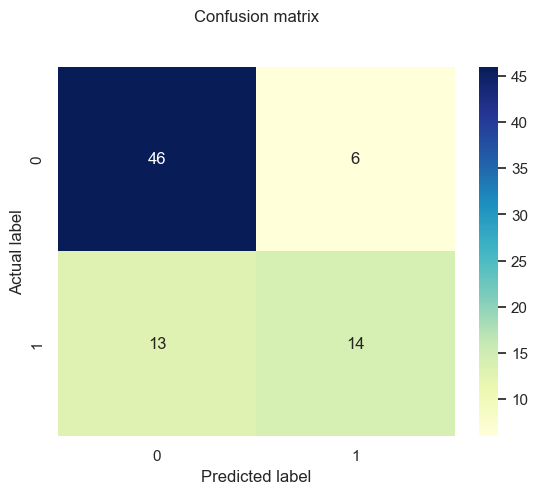

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tp=cnf_matrix[0,0]
tn=cnf_matrix[1,1]
fp=cnf_matrix[0,1]
fn=cnf_matrix[1,0]
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

MENGHITUNG METRIKS EVALUASI

In [38]:
akurasi= ((tp+tn)/(tp+tn+fp+fn)) * 100
presisi= (tp/(fp+tp)) * 100
recall= (tp/(tp+fn)) * 100
specificity= (tn/(tn+fp)) * 100
f1score= ((2*presisi*recall)/(presisi+recall))

In [39]:
print(f'Akurasi: {akurasi:.2f}%')
print(f'Presisi: {presisi:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'Specificity: {specificity:.2f}%')
print(f'F1-Score: {f1score:.2f}%')

Akurasi: 75.95%
Presisi: 88.46%
Recall: 77.97%
Specificity: 70.00%
F1-Score: 82.88%
